# Thyroid Prediction by using Machine Learning Algorithm

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Package Importing

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Datasets Reading

In [ ]:
Input_Data = pd.read_csv("Thyroid_Dataset.csv")
Input_Data

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,Class
0,41,F,f,f,f,f,f,f,f,f,...,t,125,t,1.14,t,109,f,?,SVHC,negative
1,23,F,f,f,f,f,f,f,f,f,...,t,102,f,?,f,?,f,?,other,negative
2,46,M,f,f,f,f,f,f,f,f,...,t,109,t,0.91,t,120,f,?,other,negative
3,70,F,t,f,f,f,f,f,f,f,...,t,175,f,?,f,?,f,?,other,negative
4,70,F,f,f,f,f,f,f,f,f,...,t,61,t,0.87,t,70,f,?,SVI,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,30,F,f,f,f,f,f,f,f,f,...,f,?,f,?,f,?,f,?,other,negative
3768,68,F,f,f,f,f,f,f,f,f,...,t,124,t,1.08,t,114,f,?,SVI,negative
3769,74,F,f,f,f,f,f,f,f,f,...,t,112,t,1.07,t,105,f,?,other,negative
3770,72,M,f,f,f,f,f,f,f,f,...,t,82,t,0.94,t,87,f,?,SVI,negative


# Datasets PreProcessing

In [ ]:
Input_Data.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,Class
0,41,F,f,f,f,f,f,f,f,f,...,t,125,t,1.14,t,109,f,?,SVHC,negative
1,23,F,f,f,f,f,f,f,f,f,...,t,102,f,?,f,?,f,?,other,negative
2,46,M,f,f,f,f,f,f,f,f,...,t,109,t,0.91,t,120,f,?,other,negative
3,70,F,t,f,f,f,f,f,f,f,...,t,175,f,?,f,?,f,?,other,negative
4,70,F,f,f,f,f,f,f,f,f,...,t,61,t,0.87,t,70,f,?,SVI,negative


In [ ]:
Input_Data.tail()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,Class
3767,30,F,f,f,f,f,f,f,f,f,...,f,?,f,?,f,?,f,?,other,negative
3768,68,F,f,f,f,f,f,f,f,f,...,t,124,t,1.08,t,114,f,?,SVI,negative
3769,74,F,f,f,f,f,f,f,f,f,...,t,112,t,1.07,t,105,f,?,other,negative
3770,72,M,f,f,f,f,f,f,f,f,...,t,82,t,0.94,t,87,f,?,SVI,negative
3771,64,F,f,f,f,f,f,f,f,f,...,t,99,t,1.07,t,92,f,?,other,negative


In [ ]:
Input_Data.shape

(3772, 30)

In [ ]:
Input_Data.describe()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,Class
count,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,...,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772
unique,94,3,2,2,2,2,2,2,2,2,...,2,242,2,147,2,235,1,1,5,2
top,59,F,f,f,f,f,f,f,f,f,...,t,?,t,?,t,?,f,?,other,negative
freq,95,2480,3308,3722,3729,3625,3719,3719,3713,3538,...,3541,231,3385,387,3387,385,3772,3772,2201,3541


In [ ]:
Input_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   age                        3772 non-null   object
 1   sex                        3772 non-null   object
 2   on_thyroxine               3772 non-null   object
 3   query_on_thyroxine         3772 non-null   object
 4   on_antithyroid_medication  3772 non-null   object
 5   sick                       3772 non-null   object
 6   pregnant                   3772 non-null   object
 7   thyroid_surgery            3772 non-null   object
 8   I131_treatment             3772 non-null   object
 9   query_hypothyroid          3772 non-null   object
 10  query_hyperthyroid         3772 non-null   object
 11  lithium                    3772 non-null   object
 12  goitre                     3772 non-null   object
 13  tumor                      3772 non-null   object
 14  hypopitu

In [ ]:
Input_Data.value_counts("age")

age
59     95
60     91
70     90
73     81
55     81
       ..
10      1
5       1
455     1
4       1
?       1
Length: 94, dtype: int64

In [ ]:
Input_Data.value_counts("sex")

sex
F    2480
M    1142
?     150
dtype: int64

In [ ]:
Input_Data.value_counts("on_thyroxine")

on_thyroxine
f    3308
t     464
dtype: int64

In [ ]:
Input_Data.value_counts("query_on_thyroxine")

query_on_thyroxine
f    3722
t      50
dtype: int64

In [ ]:
Input_Data.value_counts("on_antithyroid_medication")

on_antithyroid_medication
f    3729
t      43
dtype: int64

In [ ]:
Input_Data.value_counts("sick")

sick
f    3625
t     147
dtype: int64

In [ ]:
Input_Data.value_counts("pregnant")

pregnant
f    3719
t      53
dtype: int64

In [ ]:
Input_Data.value_counts("thyroid_surgery")

thyroid_surgery
f    3719
t      53
dtype: int64

In [ ]:
Input_Data.value_counts("I131_treatment")

I131_treatment
f    3713
t      59
dtype: int64

In [ ]:
Input_Data.value_counts("query_hypothyroid")

query_hypothyroid
f    3538
t     234
dtype: int64

In [ ]:
Input_Data.value_counts("query_hyperthyroid")

query_hyperthyroid
f    3535
t     237
dtype: int64

In [ ]:
Input_Data.value_counts("lithium")

lithium
f    3754
t      18
dtype: int64

In [ ]:
Input_Data.value_counts("goitre")

goitre
f    3738
t      34
dtype: int64

In [ ]:
Input_Data.value_counts("tumor")

tumor
f    3676
t      96
dtype: int64

In [ ]:
Input_Data.value_counts("hypopituitary")

hypopituitary
f    3771
t       1
dtype: int64

In [ ]:
Input_Data.value_counts("psych")

psych
f    3588
t     184
dtype: int64

In [ ]:
Input_Data.value_counts("TSH_measured")

TSH_measured
t    3403
f     369
dtype: int64

In [ ]:
Input_Data.value_counts("T3_measured")

T3_measured
t    3003
f     769
dtype: int64

In [ ]:
Input_Data.value_counts("TT4_measured")

TT4_measured
t    3541
f     231
dtype: int64

In [ ]:
Input_Data.value_counts("T4U_measured")

T4U_measured
t    3385
f     387
dtype: int64

In [ ]:
Input_Data.value_counts("FTI_measured")

FTI_measured
t    3387
f     385
dtype: int64

In [ ]:
Input_Data.value_counts("referral_source")

referral_source
other    2201
SVI      1034
SVHC      386
STMW      112
SVHD       39
dtype: int64

In [ ]:
Input_Data.value_counts("referral_source")

referral_source
other    2201
SVI      1034
SVHC      386
STMW      112
SVHD       39
dtype: int64

In [ ]:
Input_Data.value_counts("Class")

Class
negative    3541
sick         231
dtype: int64

# Data Visualization : Exploratory Data Analysis

<Axes: >

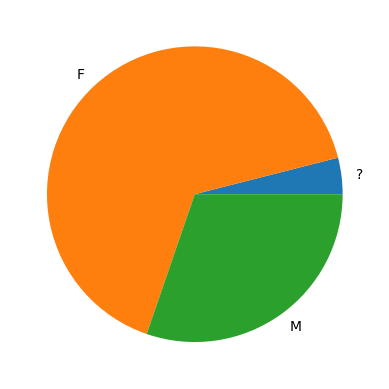

In [ ]:
Input_Data.groupby('sex').size().plot(kind='pie')

<Axes: >

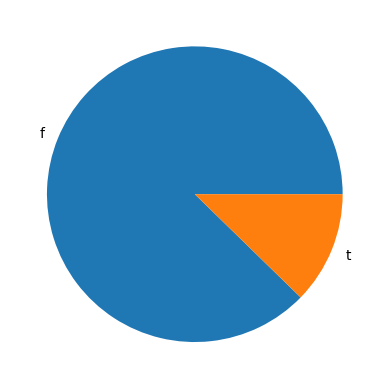

In [ ]:
Input_Data.groupby('on_thyroxine').size().plot(kind='pie')

<Axes: >

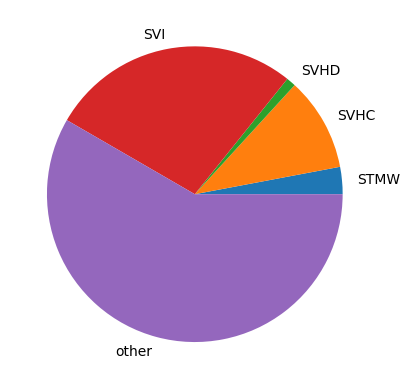

In [ ]:
Input_Data.groupby('referral_source').size().plot(kind='pie')

<Axes: >

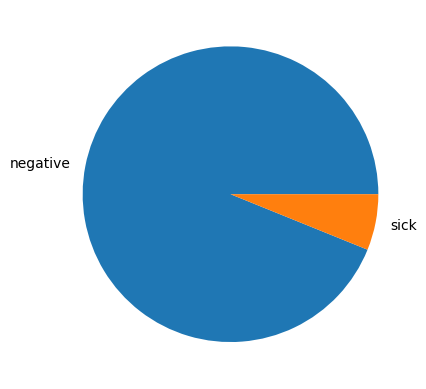

In [ ]:
Input_Data.groupby('Class').size().plot(kind='pie')

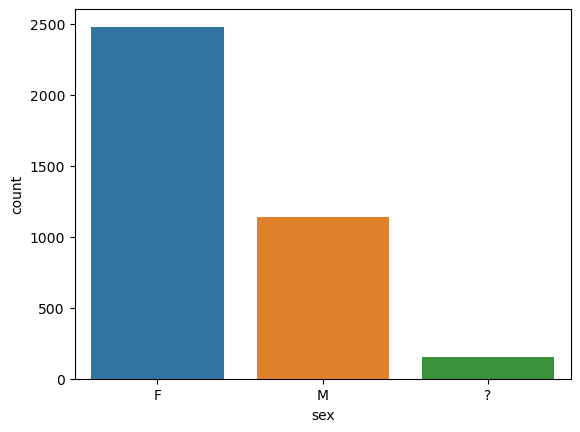

In [ ]:
# count plot on single categorical variable
sns.countplot(x ='sex', data = Input_Data)

# Show the plot
plt.show()

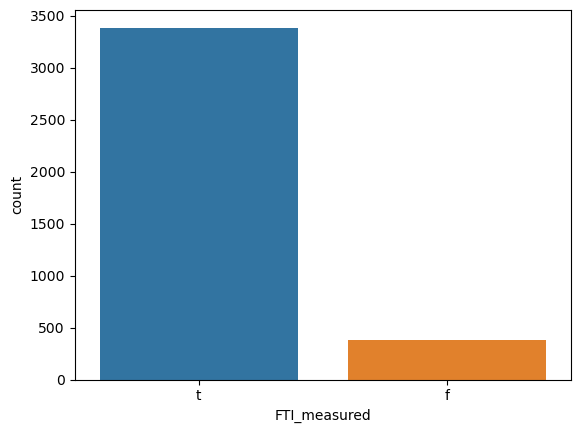

In [ ]:
# count plot on single categorical variable
sns.countplot(x ='FTI_measured', data = Input_Data)

# Show the plot
plt.show()

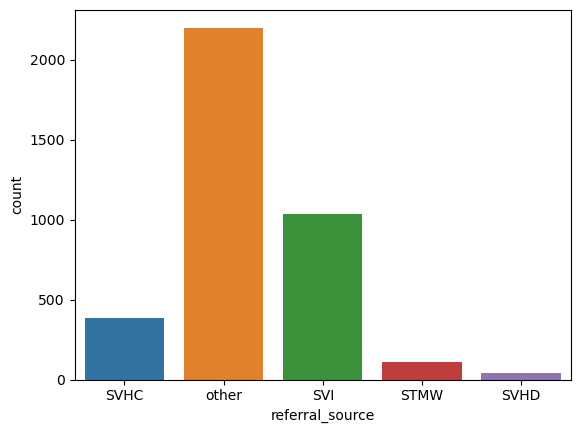

In [ ]:
# count plot on single categorical variable
sns.countplot(x ='referral_source', data = Input_Data)

# Show the plot
plt.show()

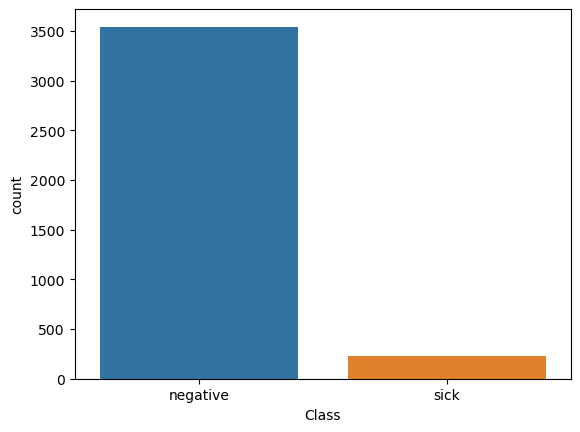

In [ ]:
# count plot on single categorical variable
sns.countplot(x ='Class', data = Input_Data)

# Show the plot
plt.show()

In [ ]:
# !pip install pandas_profiling

In [ ]:
# from pandas_profiling import ProfileReport
# profile_charu_raghav_sadhana = ProfileReport(Input_Data, title="Report for our Project", explorative=True)
# profile_charu_raghav_sadhana.to_notebook_iframe()

# Aligning the Data into Proper Format

In [ ]:
Input_Data = Input_Data.drop('TBG',axis=1)

In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
Input_Data['age']= label_encoder.fit_transform(Input_Data['age'])
Input_Data['sex']= label_encoder.fit_transform(Input_Data['sex'])
Input_Data['on_thyroxine']= label_encoder.fit_transform(Input_Data['on_thyroxine'])
Input_Data['query_on_thyroxine']= label_encoder.fit_transform(Input_Data['query_on_thyroxine'])
Input_Data['on_antithyroid_medication']= label_encoder.fit_transform(Input_Data['on_antithyroid_medication'])
Input_Data['sick']= label_encoder.fit_transform(Input_Data['sick'])
Input_Data['pregnant']= label_encoder.fit_transform(Input_Data['pregnant'])
Input_Data['thyroid_surgery']= label_encoder.fit_transform(Input_Data['thyroid_surgery'])
Input_Data['I131_treatment']= label_encoder.fit_transform(Input_Data['I131_treatment'])
Input_Data['query_hypothyroid']= label_encoder.fit_transform(Input_Data['query_hypothyroid'])
Input_Data['query_hyperthyroid']= label_encoder.fit_transform(Input_Data['query_hyperthyroid'])
Input_Data['lithium']= label_encoder.fit_transform(Input_Data['lithium'])
Input_Data['goitre']= label_encoder.fit_transform(Input_Data['goitre'])
Input_Data['tumor']= label_encoder.fit_transform(Input_Data['tumor'])
Input_Data['hypopituitary']= label_encoder.fit_transform(Input_Data['hypopituitary'])
Input_Data['psych']= label_encoder.fit_transform(Input_Data['psych'])
Input_Data['TSH_measured']= label_encoder.fit_transform(Input_Data['TSH_measured'])
Input_Data['TSH']= label_encoder.fit_transform(Input_Data['TSH'])
Input_Data['T3_measured']= label_encoder.fit_transform(Input_Data['T3_measured'])
Input_Data['T3']= label_encoder.fit_transform(Input_Data['T3'])
Input_Data['TT4_measured']= label_encoder.fit_transform(Input_Data['TT4_measured'])
Input_Data['T4U_measured']= label_encoder.fit_transform(Input_Data['T4U_measured'])
Input_Data['TT4']= label_encoder.fit_transform(Input_Data['TT4'])
Input_Data['T4U']= label_encoder.fit_transform(Input_Data['T4U'])
Input_Data['FTI_measured']= label_encoder.fit_transform(Input_Data['FTI_measured'])
Input_Data['FTI']= label_encoder.fit_transform(Input_Data['FTI'])
Input_Data['TBG_measured']= label_encoder.fit_transform(Input_Data['TBG_measured'])
Input_Data['referral_source']= label_encoder.fit_transform(Input_Data['referral_source'])
Input_Data['Class']= label_encoder.fit_transform(Input_Data['Class'])

In [ ]:
Input_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   age                        3772 non-null   int32
 1   sex                        3772 non-null   int64
 2   on_thyroxine               3772 non-null   int64
 3   query_on_thyroxine         3772 non-null   int64
 4   on_antithyroid_medication  3772 non-null   int64
 5   sick                       3772 non-null   int64
 6   pregnant                   3772 non-null   int64
 7   thyroid_surgery            3772 non-null   int64
 8   I131_treatment             3772 non-null   int64
 9   query_hypothyroid          3772 non-null   int64
 10  query_hyperthyroid         3772 non-null   int64
 11  lithium                    3772 non-null   int64
 12  goitre                     3772 non-null   int64
 13  tumor                      3772 non-null   int64
 14  hypopituitary           

# Model Implementation

In [ ]:
Input = Input_Data.drop('Class',axis = 1)
Input

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,referral_source
0,34,1,0,0,0,0,0,0,0,0,...,1,27,1,28,1,72,1,10,0,1
1,15,1,0,0,0,0,0,0,0,0,...,1,22,1,3,0,146,0,234,0,4
2,40,2,0,0,0,0,0,0,0,0,...,0,69,1,10,1,48,1,22,0,4
3,67,1,1,0,0,0,0,0,0,0,...,1,20,1,83,0,146,0,234,0,4
4,67,1,0,0,0,0,0,0,0,0,...,1,12,1,201,1,44,1,199,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,22,1,0,0,0,0,0,0,0,0,...,0,69,0,241,0,146,0,234,0,4
3768,64,1,0,0,0,0,0,0,0,0,...,1,23,1,27,1,66,1,16,0,3
3769,71,1,0,0,0,0,0,0,0,0,...,1,19,1,14,1,65,1,6,0,4
3770,69,2,0,0,0,0,0,0,0,0,...,1,22,1,222,1,51,1,219,0,3


In [ ]:
Output = Input_Data['Class']
Output

0       0
1       0
2       0
3       0
4       0
       ..
3767    0
3768    0
3769    0
3770    0
3771    0
Name: Class, Length: 3772, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Input, Output, train_size = 0.7, random_state=200)

# Machine Learning Algorithm

# Random Forest Algorithm

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
RF_Model = RandomForestClassifier()
RF_Model = RF_Model.fit(X_train, y_train)
Prediction_RF = RF_Model.predict(X_test)
Accuracy_RF = accuracy_score(y_test,Prediction_RF)
print("Model Accuracy of Random Forest Algorithm:",Accuracy_RF)

Model Accuracy of Random Forest Algorithm: 0.9823321554770318


# Classification Report of RF Algorithm

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
CR_RF = classification_report(y_test, Prediction_RF)
print("Classification Report:",)
print (CR_RF)

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1078
           1       0.85      0.76      0.80        54

    accuracy                           0.98      1132
   macro avg       0.92      0.88      0.90      1132
weighted avg       0.98      0.98      0.98      1132



# Confusion Matrix of RF Algorithm

Confusion Matrix:
[[1071    7]
 [  13   41]]


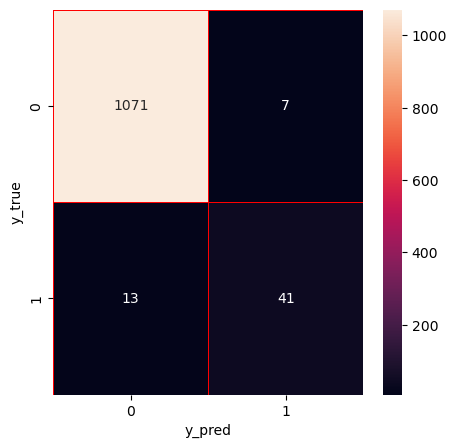

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
CM_RF = confusion_matrix(y_test, Prediction_RF)
print("Confusion Matrix:")
print(CM_RF)
f, ax=plt.subplots(figsize=(5,5))
sns.heatmap(CM_RF,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

# Logistic Regression Algorithm

In [ ]:
from sklearn import linear_model, metrics
LR_Model = linear_model.LogisticRegression()
LR_Model.fit(X_train, y_train)
Prediction_LR = LR_Model.predict(X_test)
Accuracy_LR = metrics.accuracy_score(y_test, Prediction_LR)
print("Model Accuracy of Logistic Regression Algorithm:",Accuracy_LR)

Model Accuracy of Logistic Regression Algorithm: 0.9673144876325088


D:\Users\Ramya\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Classification Report of LR Algorithm

In [ ]:
CR_LR= classification_report(y_test, Prediction_LR)
print("Classification Report:",)
print (CR_LR)

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1078
           1       0.76      0.46      0.57        54

    accuracy                           0.97      1132
   macro avg       0.87      0.73      0.78      1132
weighted avg       0.96      0.97      0.96      1132



# Confusion Matrix of LR ALgorithm

Confusion Matrix:
[[1070    8]
 [  29   25]]


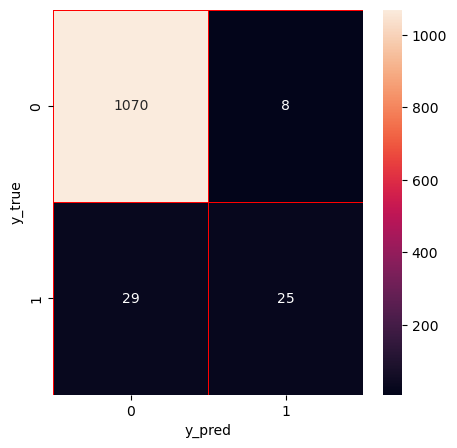

In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
CM_LR = confusion_matrix(y_test, Prediction_LR)
print("Confusion Matrix:")
print(CM_LR)
f, ax=plt.subplots(figsize=(5,5))
sns.heatmap(CM_LR,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

# Comparison of Both the Algorithm

Text(0.5, 1.0, 'Model Accuracy of all the Algorithm')

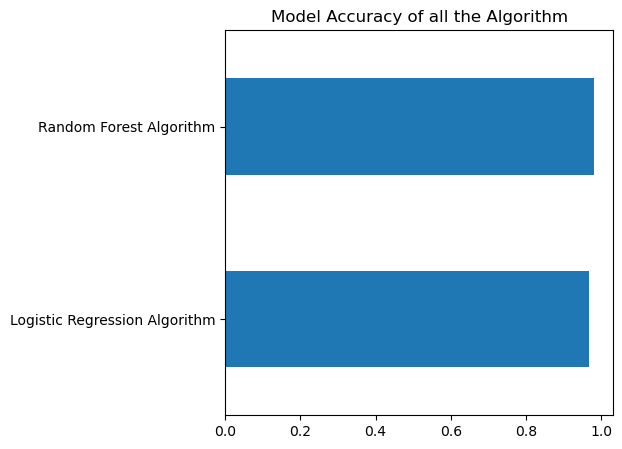

In [ ]:
Model_Accuracy= pd.Series(data=[Accuracy_RF,Accuracy_LR],
                index=['Random Forest Algorithm','Logistic Regression Algorithm'])
fig= plt.figure(figsize=(5,5))
Model_Accuracy.sort_values().plot.barh()
plt.title('Model Accuracy of all the Algorithm')

# Final Result : Random Forest is an best algorithm to identify the Thyroid Patient condition of Normal and Sick.